<a href="https://colab.research.google.com/github/sross1/SeniorProject_studentStudyAssistant/blob/main/StudentDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree for Student Profile




In [ ]:
#Libraries
%matplotlib inline
import matplotlib.pyplot as plt

import io
import random

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt

import pydotplus #pip install pydotplus
import graphviz 

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#For Google Sheets
from google.colab import files

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

#from gspread_dataframe import set_with_dataframe

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#!pip install --upgrade gspread

In [ ]:
#Import .csv here from computer https://www.youtube.com/watch?v=dEB-7w3jBKU
#upload_files = files.upload()
#for filename in upload_files.keys():
#  x=upload_files[filename].decode('utf-8')
#data1 = pd.read_csv(io.StringIO(x), header=None)
#print(data1.head())

In [ ]:
#Import directly from Google Sheets
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Lets Get to Know You: Student Profile (Responses)').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

[['', 'Email Address', 'What is your first name?', 'What is your last name?', 'What is your age?', 'Do you like online learning? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1, Depends = 2', 'How often do you procrastinate?', 'If you need help with homework/studying, what do you go to first? (Choose the number that corresponds best with your answer:)  Google/Internet = 0, Notes = 1, Textbook = 2, Friends/classmates = 3, Tutor = 4, Professor = 5, Family = 6', 'Do you use online study tools? (Choose the number that corresponds best with your answer:) No = 0, Yes = 1', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping for clothes, and you're waiting in line to pay. What are you most likely to do while you are waiting?", 'When you see the word "cat," what do you do first?', "What's the best way for you to study for a test?", "What's the best way for you to lea

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,,Email Address,What is your first name?,What is your last name?,What is your age?,Do you like online learning? (Choose the numbe...,How often do you procrastinate?,"If you need help with homework/studying, what ...",Do you use online study tools? (Choose the num...,What kind of book would you like to read for f...,"When you are not sure how to spell a word, wha...","You're out shopping for clothes, and you're wa...","When you see the word ""cat,"" what do you do fi...",What's the best way for you to study for a test?,What's the best way for you to learn about how...,"If you went to a school dance, what would you ...",What do you find most distracting when you are...,"When you are angry, what are you most likely t...","When you are happy, what are you most likely t...","When in a new place, how do you find your way ...","Of these three classes, which is your favorite?","When you hear a song on the radio, what are yo...",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a fri...,"If you won a game, which of these three prizes...",Which would you rather go to with a group of f...,What are you most likely to remember about new...,When you give someone directions to your house...
1,9/29/2021 10:31:18,klam@ltu.edu,Kim,Lam,21,2,3,3,1,3,1,1,3,1,2,3,1,1,3,2,3,1,3,2,3,3,3,2,3
2,9/29/2021 11:33:13,lukemj202@gmail.com,Luke,Mayer,19,0,3,0,0,2,2,2,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,1,2
3,9/29/2021 11:33:55,bahriadrian1@gmail.com,Adrian,Bahri,21,0,2,1,1,3,1,1,2,3,2,1,2,1,2,3,1,2,1,3,2,1,2,1,2
4,9/29/2021 11:37:13,Eforsgren@ltu.edu,Ellen,Forsgren,21,0,4,0,1,2,3,2,2,3,1,2,3,1,2,1,2,3,1,1,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,9/30/2021 8:32:29,Brendanmilliken2000@gmail.com,Brendan,Milliken,21,1,4,1,1,1,3,1,2,3,3,1,2,2,3,1,3,2,1,3,3,2,1,1,1
63,9/30/2021 10:29:39,dbourque@ltu.edu,Devyn,Bourque,22,1,3,1,1,2,1,2,2,1,3,1,2,2,2,1,1,2,1,3,1,2,2,3,2
64,9/30/2021 18:35:52,tkurokawa@ltu.edu,Theo,Kurokawa,21,2,5,1,0,1,3,1,1,2,3,1,3,2,1,1,1,3,2,2,1,3,1,1,2
65,10/6/2021 17:51:59,ladams@ltu.edu,Lucas,Adams,22,0,1,1,1,3,2,2,1,2,3,1,3,2,2,1,1,2,1,2,3,2,2,3,1


In [ ]:
#Drop first row (headers)
data = data.iloc[1:]

In [ ]:
#data

In [ ]:
#Save email as identifier 
emails = []
emails = data[1]
emails

1                      klam@ltu.edu
2               lukemj202@gmail.com
3            bahriadrian1@gmail.com
4                 Eforsgren@ltu.edu
5                  mccarr26@msu.edu
                  ...              
62    Brendanmilliken2000@gmail.com
63                 dbourque@ltu.edu
64                tkurokawa@ltu.edu
65                   ladams@ltu.edu
66                  qyeamen@ltu.edu
Name: 1, Length: 66, dtype: object

In [ ]:
#Save name as identifier 
fname = []
lname = []
fname = data[2]
lname = data[3]
print(fname)
print(lname)

1         Kim
2        Luke
3      Adrian
4       Ellen
5       Dylan
       ...   
62    Brendan
63      Devyn
64       Theo
65      Lucas
66     Quaran
Name: 2, Length: 66, dtype: object
1           Lam
2         Mayer
3         Bahri
4      Forsgren
5     McCarroll
        ...    
62     Milliken
63      Bourque
64     Kurokawa
65        Adams
66       Yeamen
Name: 3, Length: 66, dtype: object


In [ ]:
#Getting rid of extra columns that are not needed
data.drop(0, inplace=True, axis=1)
data.drop(1, inplace=True, axis=1)
data.drop(2, inplace=True, axis=1)
data.drop(3, inplace=True, axis=1)
data.drop(4, inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
1,2,3,3,1,3,1,1,3,1,2,3,1,1,3,2,3,1,3,2,3,3,3,2,3
2,0,3,0,0,2,2,2,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,1,2
3,0,2,1,1,3,1,1,2,3,2,1,2,1,2,3,1,2,1,3,2,1,2,1,2
4,0,4,0,1,2,3,2,2,3,1,2,3,1,2,1,2,3,1,1,1,2,1,2,1
5,1,4,0,1,1,1,1,3,3,1,3,1,3,1,2,1,3,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,4,1,1,1,3,1,2,3,3,1,2,2,3,1,3,2,1,3,3,2,1,1,1
63,1,3,1,1,2,1,2,2,1,3,1,2,2,2,1,1,2,1,3,1,2,2,3,2
64,2,5,1,0,1,3,1,1,2,3,1,3,2,1,1,1,3,2,2,1,3,1,1,2
65,0,1,1,1,3,2,2,1,2,3,1,3,2,2,1,1,2,1,2,3,2,2,3,1


In [ ]:
print(len(rows))
numRows = len(rows)

67


In [ ]:
#Retrieving row https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/
visualStats = [] #1
audioStats = [] #2
tactileStats = [] #3

#https://www.w3schools.com/python/python_for_loops.asp
for x in range(1, numRows):
  #Getting each person's data
  persons = data.loc[x]
  #print(persons)
  sum = persons[5]+persons[6]+persons[7]+persons[8]+persons[9]+persons[10]+persons[11]+persons[12]+persons[13]+persons[14]+persons[15]+persons[16]+persons[17]+persons[18]+persons[19]+persons[20]+persons[21]+persons[22]+persons[23]+persons[24]+persons[25]+persons[26]+persons[27]+persons[28]
  #print(sum)

  visual = 0
  audio = 0
  tactile = 0

  #Getting each person's learning data
  visual = sum.count('1')
  #print("The count of '1' is", visual)
  audio = sum.count('2')
  #print("The count of '2' is", audio)
  tactile = sum.count('3')
  #print("The count of '3' is", tactile)

  visualPer = "{:.2f}".format(visual * (1/20))
  #print(visualPer)
  visualStats.append(visualPer)
  audioPer = "{:.2f}".format(audio * (1/20))
  #print(audioPer)
  audioStats.append(audioPer)
  tactilePer = "{:.2f}".format(tactile * (1/20))
  #print(tactilePer)
  tactileStats.append(tactilePer)


In [ ]:
#writting calculated data to .csv
print(audioStats)
print(visualStats)
print(tactileStats)

['0.25', '0.70', '0.45', '0.40', '0.15', '0.20', '0.20', '0.20', '0.15', '0.20', '0.15', '0.45', '0.40', '0.25', '0.15', '0.65', '0.20', '0.35', '0.25', '0.25', '0.30', '0.15', '0.30', '0.40', '0.45', '0.35', '0.55', '0.40', '0.30', '0.25', '0.50', '0.10', '0.30', '0.35', '0.25', '0.40', '0.15', '0.35', '0.20', '0.35', '0.35', '0.30', '0.50', '0.30', '0.35', '0.25', '0.30', '0.30', '0.25', '0.35', '0.30', '0.35', '0.40', '0.35', '0.20', '0.15', '0.45', '0.40', '0.30', '0.40', '0.20', '0.25', '0.50', '0.30', '0.45', '0.45']
['0.35', '0.30', '0.50', '0.45', '0.70', '0.40', '0.35', '0.55', '0.40', '0.45', '0.40', '0.55', '0.45', '0.55', '0.40', '0.35', '0.55', '0.40', '0.45', '0.50', '0.45', '0.45', '0.40', '0.40', '0.40', '0.30', '0.25', '0.30', '0.45', '0.35', '0.35', '0.50', '0.45', '0.35', '0.30', '0.40', '0.55', '0.25', '0.45', '0.30', '0.45', '0.40', '0.40', '0.45', '0.35', '0.40', '0.40', '0.40', '0.50', '0.45', '0.20', '0.25', '0.50', '0.50', '0.50', '0.45', '0.45', '0.55', '0.55'

In [ ]:
#https://www.javatpoint.com/python-pandas-add-column-to-dataframe-columns
data.insert(24, column = "Visual", value = visualStats) 
#data.drop('Auditory', inplace=True, axis=1) 
data.insert(25, column = "Auditory", value = audioStats) 
#data.drop('Visual', inplace=True, axis=1) 
data.insert(26, column = "Tactile", value = tactileStats) 
#data.drop('Tactile', inplace=True, axis=1) 

In [ ]:
data

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Visual,Auditory,Tactile
1,2,3,3,1,3,1,1,3,1,2,3,1,1,3,2,3,1,3,2,3,3,3,2,3,0.35,0.25,0.60
2,0,3,0,0,2,2,2,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,1,2,0.30,0.70,0.05
3,0,2,1,1,3,1,1,2,3,2,1,2,1,2,3,1,2,1,3,2,1,2,1,2,0.50,0.45,0.20
4,0,4,0,1,2,3,2,2,3,1,2,3,1,2,1,2,3,1,1,1,2,1,2,1,0.45,0.40,0.20
5,1,4,0,1,1,1,1,3,3,1,3,1,3,1,2,1,3,1,1,2,1,2,1,1,0.70,0.15,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,4,1,1,1,3,1,2,3,3,1,2,2,3,1,3,2,1,3,3,2,1,1,1,0.55,0.25,0.35
63,1,3,1,1,2,1,2,2,1,3,1,2,2,2,1,1,2,1,3,1,2,2,3,2,0.50,0.50,0.20
64,2,5,1,0,1,3,1,1,2,3,1,3,2,1,1,1,3,2,2,1,3,1,1,2,0.55,0.30,0.25
65,0,1,1,1,3,2,2,1,2,3,1,3,2,2,1,1,2,1,2,3,2,2,3,1,0.45,0.45,0.25


In [ ]:
#Determine learning style manually for labels
learnStyle = []

for x in range(1, numRows):
  #Getting each person's data
  persons = data.loc[x]

  visualPer = persons['Visual']
  audioPer = persons['Auditory']
  tactilePer = persons['Tactile']

  if visualPer > audioPer and visualPer > tactilePer:
    learnStyle.append('1')
  elif audioPer > visualPer and audioPer > tactilePer:
    learnStyle.append('2')
  elif tactilePer > visualPer and tactilePer > audioPer:
    learnStyle.append('3')
  #Also need cases if there are same values
  elif visualPer == audioPer and visualPer > tactilePer:
    L = ['1', '2']
    learnStyle.append(random.choice(L))
  elif visualPer == tactilePer and visualPer > audioPer:
    L = ['1', '3']
    learnStyle.append(random.choice(L))
  elif audioPer == tactilePer and audioPer > visualPer:
    L = ['2', '3']
    learnStyle.append(random.choice(L))
  elif visualPer == tactilePer and audioPer == tactilePer: #if all three are equal
    L = ['1', '2','3']
    learnStyle.append(random.choice(L))

print(learnStyle)
print(len(learnStyle))

['3', '2', '1', '1', '1', '3', '3', '1', '3', '3', '3', '1', '1', '1', '3', '2', '1', '1', '1', '1', '1', '3', '3', '1', '2', '3', '2', '3', '1', '3', '2', '1', '1', '3', '3', '2', '1', '3', '3', '3', '1', '3', '2', '1', '3', '3', '3', '3', '1', '1', '3', '3', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '2', '1', '2', '2']
66


In [ ]:
data.insert(27, column = "Learning_Style", value = learnStyle) 
#data.drop('Learning_Style', inplace=True, axis=1)

In [ ]:
data

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Visual,Auditory,Tactile,Learning_Style
1,2,3,3,1,3,1,1,3,1,2,3,1,1,3,2,3,1,3,2,3,3,3,2,3,0.35,0.25,0.60,3
2,0,3,0,0,2,2,2,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,1,2,0.30,0.70,0.05,2
3,0,2,1,1,3,1,1,2,3,2,1,2,1,2,3,1,2,1,3,2,1,2,1,2,0.50,0.45,0.20,1
4,0,4,0,1,2,3,2,2,3,1,2,3,1,2,1,2,3,1,1,1,2,1,2,1,0.45,0.40,0.20,1
5,1,4,0,1,1,1,1,3,3,1,3,1,3,1,2,1,3,1,1,2,1,2,1,1,0.70,0.15,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,4,1,1,1,3,1,2,3,3,1,2,2,3,1,3,2,1,3,3,2,1,1,1,0.55,0.25,0.35,1
63,1,3,1,1,2,1,2,2,1,3,1,2,2,2,1,1,2,1,3,1,2,2,3,2,0.50,0.50,0.20,2
64,2,5,1,0,1,3,1,1,2,3,1,3,2,1,1,1,3,2,2,1,3,1,1,2,0.55,0.30,0.25,1
65,0,1,1,1,3,2,2,1,2,3,1,3,2,2,1,1,2,1,2,3,2,2,3,1,0.45,0.45,0.25,2


In [ ]:
#Decision Tree
dtData = np.asarray(data)
X=dtData[0:,:27]
y=dtData[0:,27:28]
#Split up the data for training (80% ---> training model is 60% and validation 20%), and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 45)
print(X_train.shape)
print(X_test.shape)

(52, 27)
(14, 27)


In [ ]:
#Split X_train (80%) into train (60%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 45) #<--- do 0.25 to get correct split
print(X_train.shape)
print(X_val.shape)

(39, 27)
(13, 27)


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy score :",dt.score(X_test,y_test))

Accuracy score : 0.5714285714285714


In [ ]:
model = DecisionTreeClassifier().fit(X_train,y_train)
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_26 <= 0.38
|   |--- feature_23 <= 1.50
|   |   |--- class: 1
|   |--- feature_23 >  1.50
|   |   |--- feature_24 <= 0.47
|   |   |   |--- class: 2
|   |   |--- feature_24 >  0.47
|   |   |   |--- feature_8 <= 1.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  1.50
|   |   |   |   |--- class: 1
|--- feature_26 >  0.38
|   |--- feature_24 <= 0.47
|   |   |--- class: 3
|   |--- feature_24 >  0.47
|   |   |--- class: 1



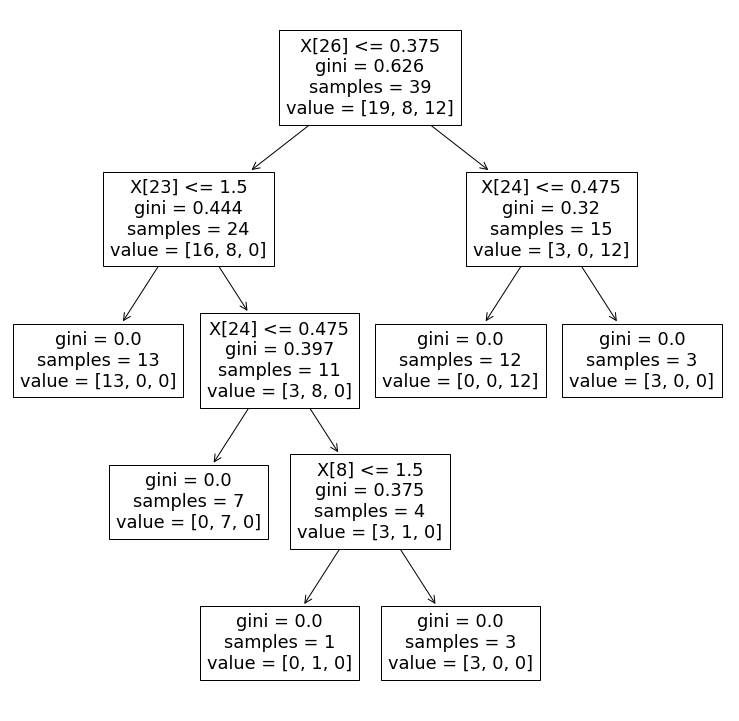

In [ ]:
fig = plt.figure(figsize=(13,13))
_ = tree.plot_tree(dt)

In [ ]:
#clf = tree.DecisionTreeClassifier(criterion="entropy")
#clf = clf.fit(X_train, y_train)

#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 

#classNames =['1', '2', '3']

#dot_data = tree.export_graphviz(clf, out_file=None, 
#                         class_names=classNames,
#                         filled=True, rounded=True,  
#                         special_characters=True)  
#graph = graphviz.Source(dot_data)
#graph

In [ ]:
#Testing 
result1=model.predict(X_test)
print(result1)

['1' '3' '1' '1' '3' '3' '2' '1' '2' '3' '3' '2' '3' '3']


In [ ]:
print(y_test)

[['1']
 ['3']
 ['2']
 ['2']
 ['3']
 ['3']
 ['1']
 ['1']
 ['1']
 ['3']
 ['3']
 ['1']
 ['1']
 ['3']]


In [ ]:
predStyle=model.predict(X)
print(predStyle)
print(len(predStyle))
print(learnStyle)
print(len(learnStyle))

acc = accuracy_score(learnStyle, predStyle)
print(acc)

['3' '2' '1' '1' '1' '3' '3' '1' '3' '3' '3' '1' '1' '1' '3' '2' '2' '1'
 '3' '2' '1' '3' '3' '1' '2' '3' '1' '3' '1' '3' '2' '1' '1' '3' '3' '2'
 '1' '3' '3' '3' '2' '3' '1' '2' '2' '3' '3' '3' '1' '1' '3' '3' '1' '1'
 '1' '3' '2' '1' '1' '1' '3' '1' '2' '2' '1' '2']
66
['3', '2', '1', '1', '1', '3', '3', '1', '3', '3', '3', '1', '1', '1', '3', '2', '1', '1', '1', '1', '1', '3', '3', '1', '2', '3', '2', '3', '1', '3', '2', '1', '1', '3', '3', '2', '1', '3', '3', '3', '1', '3', '2', '1', '3', '3', '3', '3', '1', '1', '3', '3', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '2', '1', '2', '2']
66
0.8484848484848485


In [ ]:
predictedStyle = []

for x in predStyle:
  if x == '1':
    predictedStyle.append('Visual')
  elif x == '2':
    predictedStyle.append('Auditory')
  elif x == '3':
    predictedStyle.append('Tactile')

print(predictedStyle)
print(len(predictedStyle))

['Tactile', 'Auditory', 'Visual', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Tactile', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Visual', 'Tactile', 'Auditory', 'Auditory', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Auditory', 'Tactile', 'Visual', 'Tactile', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Auditory', 'Visual', 'Tactile', 'Tactile', 'Tactile', 'Auditory', 'Tactile', 'Visual', 'Auditory', 'Auditory', 'Tactile', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Visual', 'Visual', 'Tactile', 'Visual', 'Auditory', 'Auditory', 'Visual', 'Auditory']
66


In [ ]:
actStyle = []

for x in learnStyle:
  if x == '1':
    actStyle.append('Visual')
  elif x == '2':
    actStyle.append('Auditory')
  elif x == '3':
    actStyle.append('Tactile')

print(actStyle)
print(len(actStyle))

['Tactile', 'Auditory', 'Visual', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Tactile', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Visual', 'Visual', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Auditory', 'Tactile', 'Auditory', 'Tactile', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Auditory', 'Visual', 'Tactile', 'Tactile', 'Tactile', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Tactile', 'Tactile', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Tactile', 'Tactile', 'Visual', 'Visual', 'Visual', 'Tactile', 'Auditory', 'Visual', 'Visual', 'Visual', 'Tactile', 'Visual', 'Auditory', 'Visual', 'Auditory', 'Auditory']
66


In [ ]:
#Create dataframe
output = []
output = pd.DataFrame(output)

#insert information
output.insert(0, column = "Email", value = emails)
output.insert(1, column = "First Name", value = fname)
output.insert(2, column = "Last Name", value = lname)
output.insert(3, column = "ActLearnStyle", value = actStyle)
output.insert(4, column = "PredLearnStyle", value = predictedStyle)

In [ ]:
output

,Email,First Name,Last Name,ActLearnStyle,PredLearnStyle
1,klam@ltu.edu,Kim,Lam,Tactile,Tactile
2,lukemj202@gmail.com,Luke,Mayer,Auditory,Auditory
3,bahriadrian1@gmail.com,Adrian,Bahri,Visual,Visual
4,Eforsgren@ltu.edu,Ellen,Forsgren,Visual,Visual
5,mccarr26@msu.edu,Dylan,McCarroll,Visual,Visual
...,...,...,...,...,...
62,Brendanmilliken2000@gmail.com,Brendan,Milliken,Visual,Visual
63,dbourque@ltu.edu,Devyn,Bourque,Auditory,Auditory
64,tkurokawa@ltu.edu,Theo,Kurokawa,Visual,Auditory
65,ladams@ltu.edu,Lucas,Adams,Auditory,Visual


In [ ]:
#https://docs.gspread.org/en/latest/user-guide.html#updating-cells
#https://stackoverflow.com/questions/43772362/how-to-print-a-specific-row-of-a-pandas-dataframe 
print(output.loc[[23]])

             Email First Name Last Name ActLearnStyle PredLearnStyle
23  cchung@ltu.edu   Chan-Jin     Chung       Tactile        Tactile


In [ ]:
#Export to output.csv ---> https://gist.github.com/korakot/3c9a33c12c6547ed38b2ca4b1e311426
#https://stackoverflow.com/questions/62917910/python-export-pandas-dataframe-to-google-sheets-solved
#title = 'output'
#gc.create(title)  # if not exist 
#sheet = gc.open('output').sheet1
#set_with_dataframe(sheet, output) 

#Create new sheet if we don't have one already
#sh = gc.create('Output: Student PredLearnStyle')

# Open our new sheet and add some data.
worksheet = gc.open('Output: Student PredLearnStyle').sheet1

worksheet.update([output.columns.values.tolist()] + output.values.tolist())

{'spreadsheetId': '1teB-_0Q0yENidSRv6iW9FwvXRZm63OEE9ldTqPOEbw8',
 'updatedCells': 335,
 'updatedColumns': 5,
 'updatedRange': 'Sheet1!A1:E67',
 'updatedRows': 67}